In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('../Data/parquet/output_steam_games.parquet')

In [3]:
df.head(5)

,publisher,genres,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"Action, casual, indie, simulation, strategy",Lost summoner kitty,Http://store.steampowered.com/app/761140/lost_...,2018-01-04,"Strategy, action, indie, casual, simulation",Http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140,Kotoshiro
88311,"Making fun, inc.","Free to play, indie, rpg, strategy",Ironbound,Http://store.steampowered.com/app/643980/ironb...,2018-01-04,"Free to play, strategy, indie, rpg, card game,...",Http://steamcommunity.com/app/643980/reviews/?...,"Single-player, multi-player, online multi-play...",0.00,False,643980,Secret level srl
88312,Poolians.com,"Casual, free to play, indie, simulation, sports",Real pool 3d - poolians,Http://store.steampowered.com/app/670290/real_...,2017-07-24,"Free to play, simulation, sports, casual, indi...",Http://steamcommunity.com/app/670290/reviews/?...,"Single-player, multi-player, online multi-play...",0.00,False,670290,Poolians.com
88313,彼岸领域,"Action, adventure, casual",弹炸人2222,Http://store.steampowered.com/app/767400/2222/,2017-12-07,"Action, adventure, casual",Http://steamcommunity.com/app/767400/reviews/?...,Single-player,0.99,False,767400,彼岸领域
88315,Trickjump games ltd,"Action, adventure, simulation",Battle royale trainer,Http://store.steampowered.com/app/772540/battl...,2018-01-04,"Action, adventure, simulation, fps, shooter, t...",Http://steamcommunity.com/app/772540/reviews/?...,"Single-player, steam achievements",3.99,False,772540,Trickjump games ltd


In [4]:
df.isnull().sum()

publisher       0
genres          0
title           0
url             0
release_date    0
tags            0
reviews_url     0
specs           0
price           0
early_access    0
id              0
developer       0
dtype: int64

In [5]:
df['price'].describe()

count    22530.000000
mean         8.968208
std         15.418252
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

In [6]:
q1 = df['price'].quantile(0.25)  # 1st Quartile
median = df['price'].median()    # Median
q3 = df['price'].quantile(0.75)  # 3rd Quartile
minimum = df['price'].min()      # Minimum
maximum = df['price'].max()      # Maximum

In [7]:
print("Estadísticas Descriptivas para 'price':")
print("\n1st Quartile (25th percentile):", q1)
print("Median (50th percentile):", median)
print("3rd Quartile (75th percentile):", q3)
print("Minimum:", minimum)
print("Maximum:", maximum)

Estadísticas Descriptivas para 'price':

1st Quartile (25th percentile): 2.99
Median (50th percentile): 4.99
3rd Quartile (75th percentile): 9.99
Minimum: 0.0
Maximum: 995.0


Las estadísticas descriptivas para la columna 'price' indican lo siguiente:

- El recuento de observaciones en la columna 'price' es de 22,530.
- La media (promedio) de los precios es de aproximadamente 8.97.
- La desviación estándar de los precios es de alrededor de 15.42, lo que indica la dispersión de los precios respecto a la media.
- El precio mínimo es 0, lo que puede indicar juegos gratuitos u ofertas especiales.
- El primer cuartil (25th percentile) es 2.99, lo que significa que el 25% de los precios están por debajo de este valor.
- La mediana (50th percentile) es 4.99, lo que indica que la mitad de los precios están por encima y la mitad por debajo de este valor.
- El tercer cuartil (75th percentile) es 9.99, lo que significa que el 75% de los precios están por debajo de este valor.
- El precio máximo es 995.0, indicando el precio más alto registrado en la muestra.

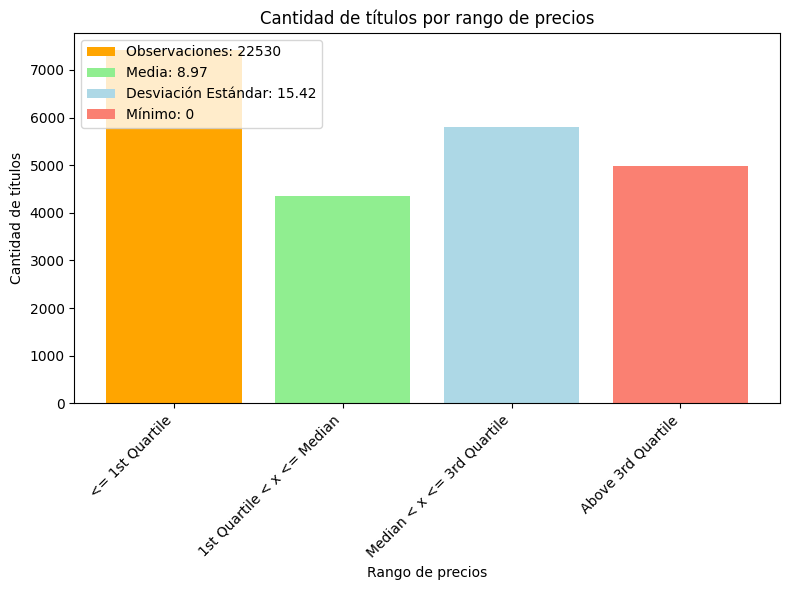

In [22]:
# Calcular los percentiles
q1 = df['price'].quantile(0.25)  # 1st Quartile
median = df['price'].median()    # Median
q3 = df['price'].quantile(0.75)  # 3rd Quartile

# Calcular la cantidad de títulos en cada percentil
total_titles = len(df)
titles_q1 = len(df[df['price'] <= q1])
titles_median = len(df[(df['price'] > q1) & (df['price'] <= median)])
titles_q3 = len(df[(df['price'] > median) & (df['price'] <= q3)])
titles_above_q3 = len(df[df['price'] > q3])

# Crear el gráfico de barras
percentiles = ['<= 1st Quartile', '1st Quartile < x <= Median', 'Median < x <= 3rd Quartile', 'Above 3rd Quartile']
titles_count = [titles_q1, titles_median, titles_q3, titles_above_q3]
colors = ['orange', 'lightgreen', 'lightblue', 'salmon']

plt.figure(figsize=(8, 6))
bars = plt.bar(percentiles, titles_count, color=colors)
plt.xlabel('Rango de precios')
plt.ylabel('Cantidad de títulos')
plt.title('Cantidad de títulos por rango de precios')

# Rotar las etiquetas del eje x a 45 grados
plt.xticks(rotation=45, ha='right')

# Agregar leyenda
legend_labels = [
    f'Observaciones: {total_titles}',
    f'Media: {8.97}',
    f'Desviación Estándar: {15.42}',
    f'Mínimo: {0}',
    f'25th Percentile: {2.99}',
    f'50th Percentile: {4.99}',
    f'75th Percentile: {9.99}',
    f'Máximo: {995.0}'
]

plt.legend(bars, legend_labels, loc='upper left')
plt.tight_layout()

plt.show()